In [44]:
import pandas as pd;
import numpy as np;
from sklearn.metrics import silhouette_samples as ss
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import itertools 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [45]:
# Load dataset (replace with your actual data loading method)
survey_df = pd.read_csv("../../data/final_survey_table.csv", low_memory=False)

In [46]:
survey_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,income_category
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years,T20
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years,B40
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years,M40
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years,T20
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years,B40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years,B40
7795,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years,M40
7796,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years,M40
7797,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years,T20


In [47]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 16 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

C:\Users\Huawei\AppData\Local\Temp\ipykernel_15356\3507331483.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


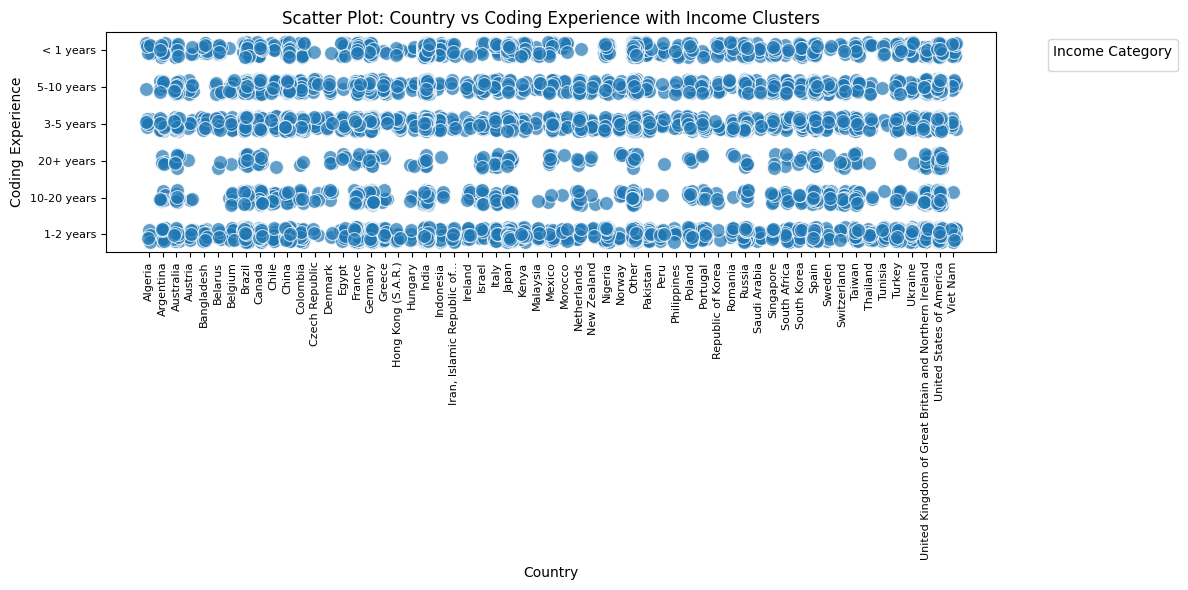

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    # hue=df['income_category'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Coding Experience with Income Clusters')
plt.xlabel('Country')
plt.ylabel('Coding Experience')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=90, fontsize=8)
ytick_locs = survey_df['Coding_Experience_Encoded'].unique()
ytick_labels = survey_df['How long have you been writing code to analyze data (at work or at school)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_15356\633247974.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


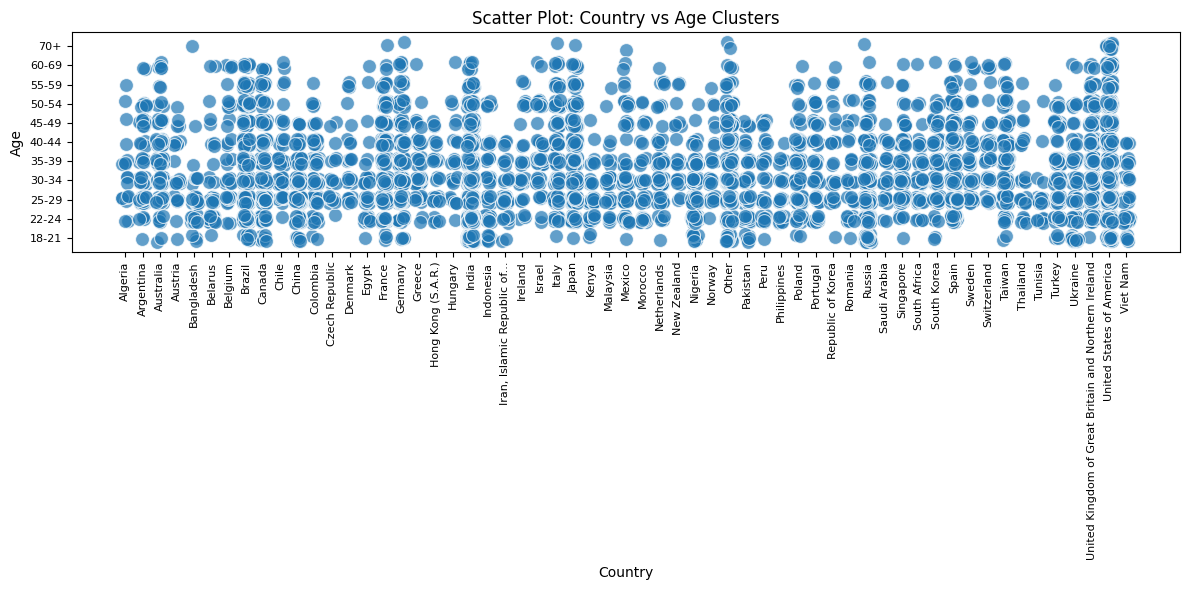

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Age_Encoded'] = survey_df['What is your age (# years)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Age_Jittered'] = jitter(survey_df['Age_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Age_Jittered'],
    # hue=df['income_category'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Age Clusters')
plt.xlabel('Country')
plt.ylabel('Age')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=90, fontsize=8)
ytick_locs = survey_df['Age_Encoded'].unique()
ytick_labels = survey_df['What is your age (# years)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
# plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_15356\3757757660.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


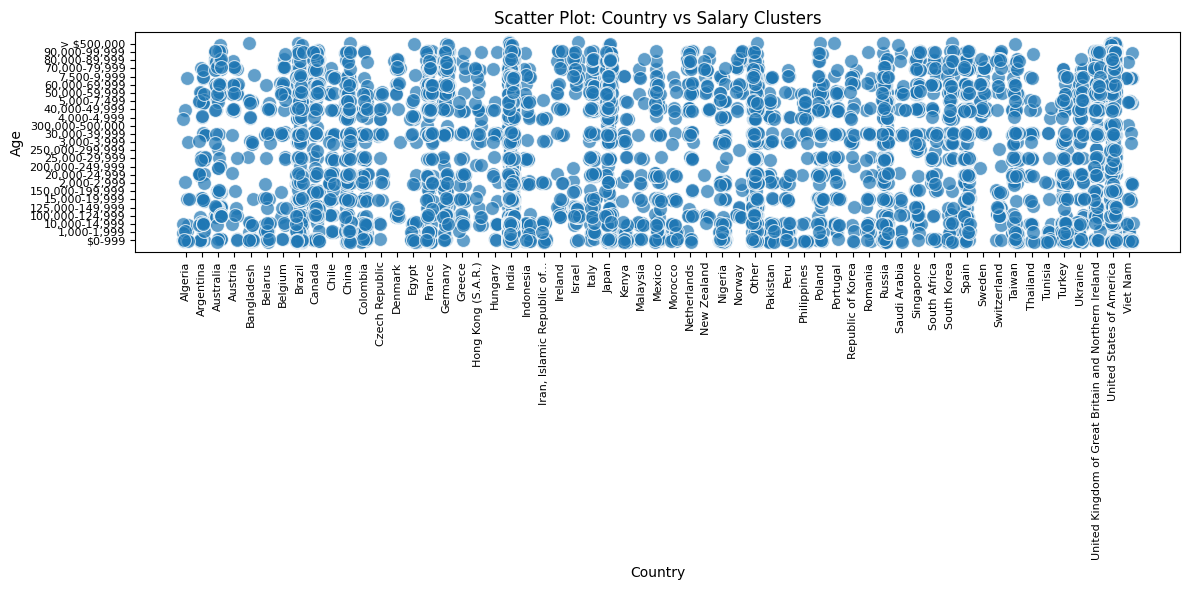

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Salary_Encoded'] = survey_df['What is your current yearly compensation (approximate $USD)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Salary_Jittered'] = jitter(survey_df['Salary_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Salary_Jittered'],
    # hue=df['income_category'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Salary Clusters')
plt.xlabel('Country')
plt.ylabel('Age')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=90, fontsize=8)
ytick_locs = survey_df['Salary_Encoded'].unique()
ytick_labels = survey_df['What is your current yearly compensation (approximate $USD)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
# plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

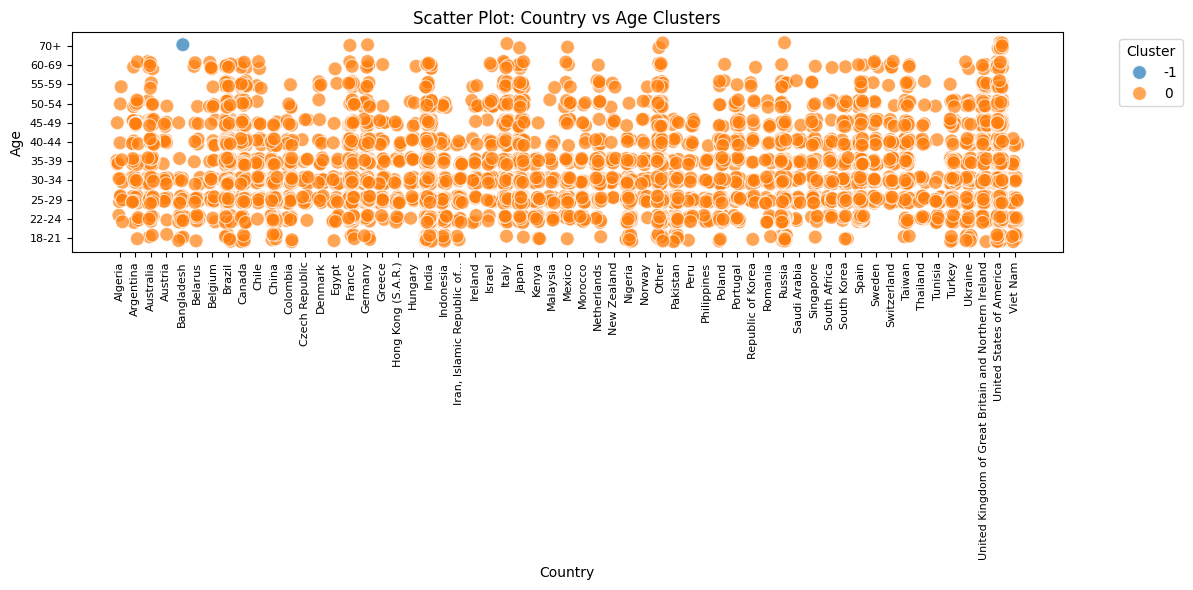

In [51]:
# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Age_Encoded'] = survey_df['What is your age (# years)?'].astype('category').cat.codes

# Prepare the features for clustering
features = survey_df[['Country_Encoded', 'Age_Encoded']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
survey_df['Cluster'] = dbscan.fit_predict(features_scaled)

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Age_Jittered'] = jitter(survey_df['Age_Encoded'])

# Create the scatter plot with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Age_Jittered'],
    hue=survey_df['Cluster'],  # Color by cluster
    palette='tab10',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Age Clusters')
plt.xlabel('Country')
plt.ylabel('Age')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=90, fontsize=8)
ytick_locs = survey_df['Age_Encoded'].unique()
ytick_labels = survey_df['What is your age (# years)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

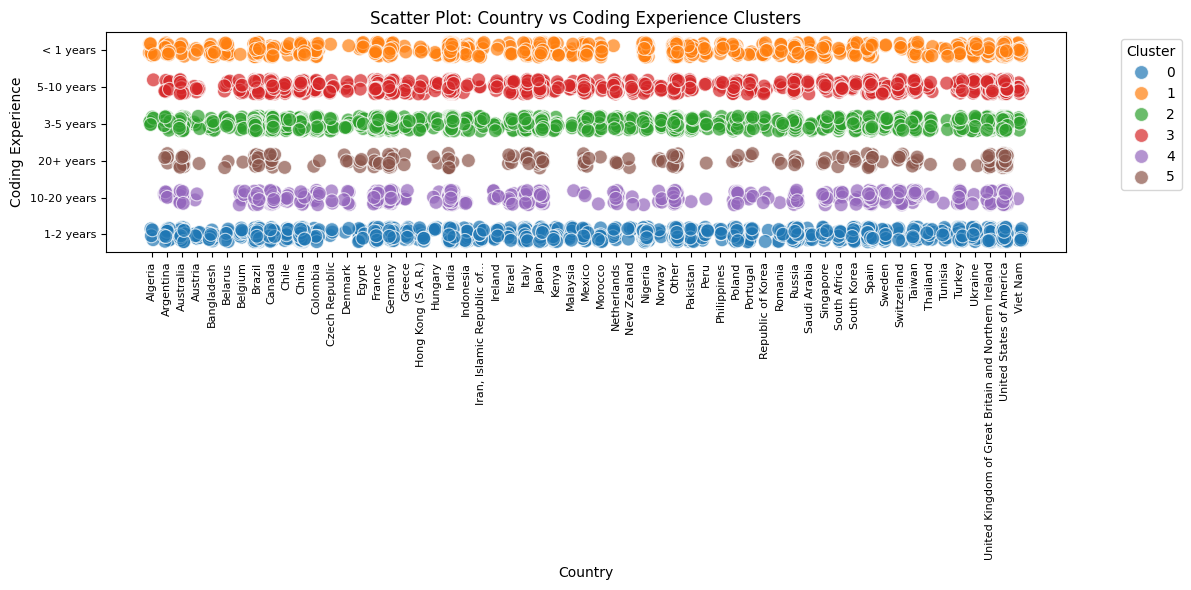

In [52]:
# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Prepare the features for clustering
features = survey_df[['Country_Encoded', 'Coding_Experience_Encoded']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Adjust parameters as needed
survey_df['Cluster'] = dbscan.fit_predict(features_scaled)

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Create the scatter plot with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    hue=survey_df['Cluster'],  # Color by cluster
    palette='tab10',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Coding Experience Clusters')
plt.xlabel('Country')
plt.ylabel('Coding Experience')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=90, fontsize=8)
ytick_locs = survey_df['Coding_Experience_Encoded'].unique()
ytick_labels = survey_df['How long have you been writing code to analyze data (at work or at school)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


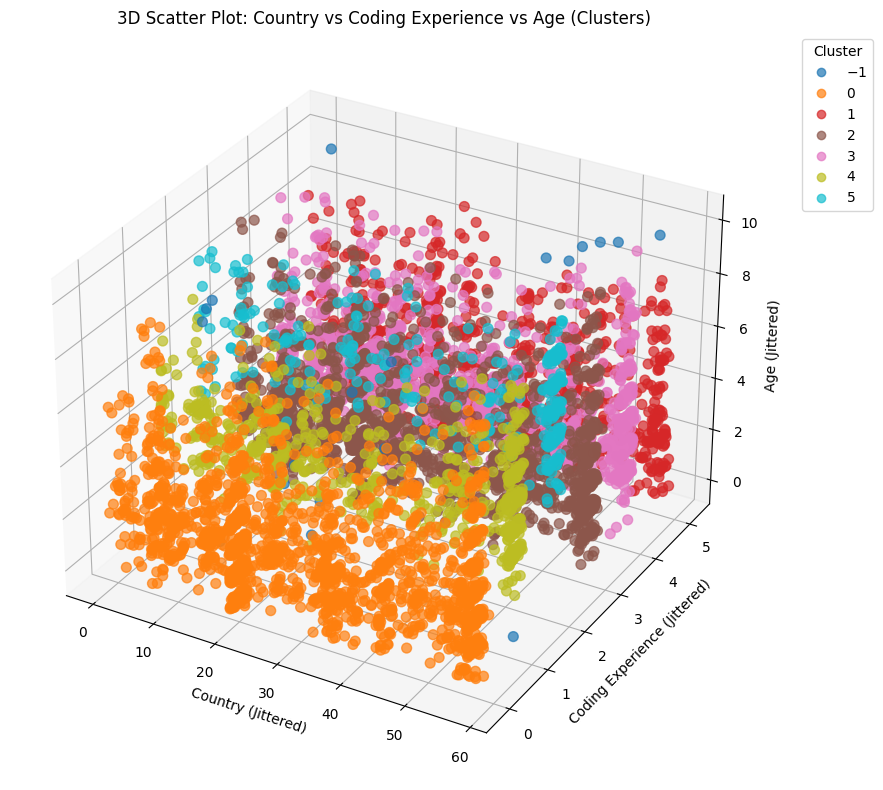

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# Add age to the encoded features
survey_df['Age_Encoded'] = survey_df['What is your age (# years)?'].astype('category').cat.codes

# Update the features for clustering
features = survey_df[['Country_Encoded', 'Coding_Experience_Encoded', 'Age_Encoded']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
survey_df['Cluster'] = dbscan.fit_predict(features_scaled)

# Add jitter to age for visualization
survey_df['Age_Jittered'] = jitter(survey_df['Age_Encoded'])

# Create a 3D scatter plot with clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    survey_df['Country_Jittered'],
    survey_df['Coding_Experience_Jittered'],
    survey_df['Age_Jittered'],
    c=survey_df['Cluster'],  # Color by cluster
    cmap='tab10',
    s=50,  # Point size
    alpha=0.7
)

# Add labels
ax.set_title('3D Scatter Plot: Country vs Coding Experience vs Age (Clusters)')
ax.set_xlabel('Country (Jittered)')
ax.set_ylabel('Coding Experience (Jittered)')
ax.set_zlabel('Age (Jittered)')

# Add legend for clusters
legend = ax.legend(
    *scatter.legend_elements(),
    title='Cluster',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
# fig.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()
